In [1]:
# Libraries needed for the tutorial

import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
    
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/mohit-baliyan/references/master/diabetes.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',')

# Printing out the first 5 rows of the dataframe

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
import numpy as np
import math
import warnings

X = df.drop("Outcome", axis=1).to_numpy().T
Y = df['Outcome'].to_numpy()

# Initialize weights & bias to random values

W = np.random.rand(df.shape[1] - 1)
b = 0

# An empty to list to append loss from each epoch
J = []

# suppress warnings
warnings.filterwarnings('ignore')

# custom function
def sigmoid(x):
  return np.exp(x)/(1 + np.exp(x))

# define vectorized sigmoid
sigmoid_v = np.vectorize(sigmoid)
lr = 0.00001

for epochs in range(0, 5000000):    
    
    Z = np.dot(W.T, X) + b
    
    A = 1/(1 + np.exp(-Z))
    
    # append the loss to the list
    J.append(np.sum(-(Y*np.log(A) + (1-Y)*np.log(1-A))))
    
    # partial derivatives of loss function w.r.t. the logit i.e. Z 
    # (equation derived analytically)
    dZ = A - Y
    
    m = len(df)
    
    # partial derivatives of loss function w.r.t. weight parameters for each predictor and bias
    # (equation derived analytically)
    dW = (1/m)*np.dot(X, dZ)
    
    # partial derivatives of loss function w.r.t. bias parameter
    # (equation derived analytically)
    db = (1/m)*np.sum(dZ)
    
    # update weights and bias by taking a step in the opposite direction of gradient
    W = W - lr*dW
    b = b - lr*db
    
print(A)


[0.47639637 0.1971903  0.50398409 0.2054428  0.76799314 0.25683559
 0.3225003  0.77214239 0.75779696 0.19702091 0.21433369 0.54790781
 0.62027945 0.91616126 0.57389433 0.72798096 0.35697656 0.30570532
 0.52646981 0.31990651 0.369243   0.3963853  0.47985716 0.2787558
 0.5200176  0.50671706 0.4704647  0.25023227 0.5639473  0.26276726
 0.44812247 0.4722043  0.25229577 0.14897313 0.40711748 0.45783723
 0.47095864 0.41625829 0.2440716  0.6405727  0.41138698 0.42567251
 0.23997926 0.62720085 0.47227786 0.50460823 0.37266925 0.17565201
 0.36922972 0.50463629 0.16600143 0.29829082 0.25784079 0.67468807
 0.7155187  0.20358625 0.70353742 0.27504177 0.48330121 0.29279226
 0.36332848 0.43126942 0.27889636 0.37974039 0.43086088 0.23681941
 0.21021706 0.36988805 0.18681098 0.25879313 0.34954449 0.40330629
 0.52828039 0.35418772 0.15591644 0.14094327 0.29991995 0.27082388
 0.6784444  0.20890806 0.29360765 0.33325473 0.33910098 0.16202087
 0.27269824 0.30957369 0.46449639 0.29121664 0.64711804 0.18268

In [3]:
J = np.array(J)
J

array([        nan,         nan,         nan, ..., 59.30577253,
       59.30577159, 59.30577064])

In [4]:
J[(~np.isinf(J)) & (~np.isnan(J))]

array([745.93993595, 745.84962689, 745.75941281, ...,  59.30577253,
        59.30577159,  59.30577064])

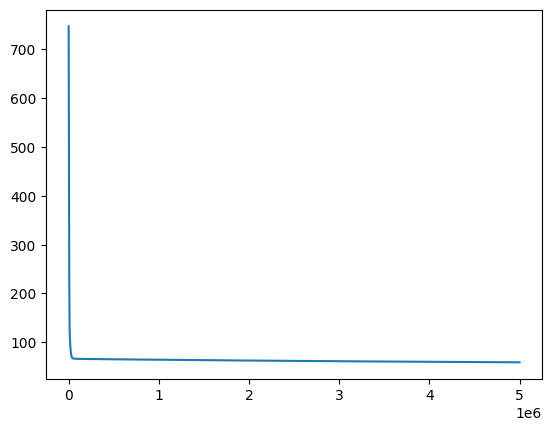

In [5]:
plt.plot(J[(~np.isinf(J)) & (~np.isnan(J))])

In [6]:
result = np.round(A)

In [7]:
# accuracy of our logistic regression
np.sum(result == Y) / len(Y)

0.7407407407407407

In [8]:
W

array([ 0.07691857,  0.00625639, -0.02316007, -0.00478187,  0.00269485,
        0.02494391,  0.45055505,  0.02102157])

In [9]:
b

-1.818741884392334

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X.T, Y)
result = model.predict(X.T)

In [11]:
# accuracy of sklearn's logistic regression
np.sum(result == Y) / len(Y)

0.75

In [12]:
# how many 1's in data?
np.sum(Y)/len(Y)

0.35185185185185186

In [13]:
model.coef_

array([[ 0.05037846,  0.02912388, -0.01239457,  0.01482378, -0.00091604,
         0.06861668,  0.05152803,  0.04261078]])